In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ## better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [4]:
numerical = df.select_dtypes(int)

In [5]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [6]:
categoricals = df.select_dtypes(object)

## Activity 6

### One Hot/Label Encoding of the categorical variables in the categoricals data frame

In [7]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [8]:
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [9]:
categoricals.effective_to_date.unique()

array(['2/18/11', '1/18/11', '2/10/11', '1/11/11', '1/17/11', '2/14/11',
       '2/24/11', '1/19/11', '1/4/11', '1/2/11', '2/7/11', '1/31/11',
       '1/26/11', '2/28/11', '1/16/11', '2/26/11', '2/23/11', '1/15/11',
       '2/2/11', '2/15/11', '1/24/11', '2/21/11', '2/22/11', '1/7/11',
       '1/28/11', '2/8/11', '2/12/11', '2/20/11', '1/5/11', '2/19/11',
       '1/3/11', '2/3/11', '1/22/11', '1/23/11', '2/5/11', '2/13/11',
       '1/25/11', '2/16/11', '2/1/11', '1/27/11', '1/12/11', '1/20/11',
       '2/6/11', '2/11/11', '1/21/11', '1/29/11', '1/9/11', '2/9/11',
       '2/27/11', '1/1/11', '2/17/11', '2/25/11', '1/13/11', '1/6/11',
       '2/4/11', '1/14/11', '1/10/11', '1/8/11', '1/30/11'], dtype=object)

I am going to delete "effective_to_date" because it doesn't make sense to make dummies from every date. In addition we already have a "Month" column.

In [10]:
categoricals.drop(["effective_to_date"],axis=1,inplace=True)

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Which one are ordinals? 
As we have some columns with an order, we want to change it manually

In [11]:
from category_encoders import OrdinalEncoder 

In [12]:
maplist = [{'col': 'coverage', 'mapping': {'basic': 0, 'extended': 1,'premium': 2}}]
oe = OrdinalEncoder(mapping=maplist)
categoricals = oe.fit_transform(categoricals)
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,0,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,0,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,0,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,1,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,2,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,0,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,1,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,2,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [13]:
categoricals.coverage.value_counts()

0    6523
1    3206
2     960
Name: coverage, dtype: int64

In [14]:
maplist2 = [{'col': 'education', 'mapping': {'high school or below': 0, 'college': 1,'bachelor': 2, 'master': 3,'doctor': 4 }}]
oe = OrdinalEncoder(mapping=maplist2)
categoricals = oe.fit_transform(categoricals)
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,0,1,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,0,1,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,0,2,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,1,1,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,2,2,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,0,1,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,1,2,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,2,1,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [15]:
maplist3 = [{'col': 'vehicle_size', 'mapping': {'small': 0, 'medsize': 1,'large': 2}}]
oe = OrdinalEncoder(mapping=maplist3)
categoricals = oe.fit_transform(categoricals)
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,0,1,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,1
1,west region,no,0,1,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,1
2,east,no,0,2,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,1
3,north west,yes,1,1,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,1
4,north west,no,2,2,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,1
10685,north west,no,0,1,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,1
10686,central,no,1,2,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,1
10687,west region,no,2,1,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,1


In [16]:
maplist4 = [{'col': 'month', 'mapping': {'january': 0, 'february': 1}}]
oe = OrdinalEncoder(mapping=maplist4)
categoricals = oe.fit_transform(categoricals)
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,0,1,-1.0,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,1
1,west region,no,0,1,-1.0,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,1
2,east,no,0,2,-1.0,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,1
3,north west,yes,1,1,-1.0,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,1
4,north west,no,2,2,-1.0,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,-1.0,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,1
10685,north west,no,0,1,-1.0,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,1
10686,central,no,1,2,-1.0,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,1
10687,west region,no,2,1,-1.0,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,1


In [17]:
categoricals.vehicle_size.unique()

array([1, 0, 2])

In [18]:
categoricals.education.unique()

array([1, 2, 0, 4, 3])

#### Which one are nominals? GET DUMMIES

In [19]:
categoricals.policy.unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

We can group all the corporate in a unique value, and the same for personal and corporate

In [20]:
categoricals.policy = categoricals.policy.apply(lambda x: 'corporate' if 'corporate' in x else x)
categoricals.policy

0          corporate
1        personal l3
2        personal l3
3          corporate
4        personal l2
            ...     
10684    personal l1
10685    personal l3
10686      corporate
10687    personal l1
10688    personal l1
Name: policy, Length: 10689, dtype: object

In [21]:
categoricals.policy = categoricals.policy.apply(lambda x: 'personal' if 'personal' in x else x)
categoricals.policy = categoricals.policy.apply(lambda x: 'special' if 'special' in x else x)

In [22]:
categoricals.policy.value_counts()

personal     7937
corporate    2312
special       440
Name: policy, dtype: int64

- We can also group luxury car and luxury suv 

In [23]:
categoricals.vehicle_class.unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury car',
       'luxury suv'], dtype=object)

In [24]:
categoricals.vehicle_class = categoricals.vehicle_class.apply(lambda x: 'luxury' if 'luxury' in x else x)
categoricals.vehicle_class.unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury'],
      dtype=object)

- After get dummies, we would have the policy and policy type columns which would be almost identical. For this reason, we remove policy_type before.

In [25]:
categoricals.drop(["policy_type"],axis=1,inplace=True)

<b> Get dummies with drop first

- Keep in mind that this eliminates one of the categories, for exemple we don't need gender_m and gender_f, just gender_m

In [26]:
categoricals = pd.get_dummies(data=categoricals, columns=['region', 'response','employment_status','gender','location_code','marital_status','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)

In [27]:
categoricals.columns

Index(['coverage', 'education', 'month', 'vehicle_size', 'region_east',
       'region_north west', 'region_west region', 'response_yes',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single', 'policy_personal',
       'policy_special', 'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury', 'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car'],
      dtype='object')

### check if there are highly correlated features and drop them if there are any.

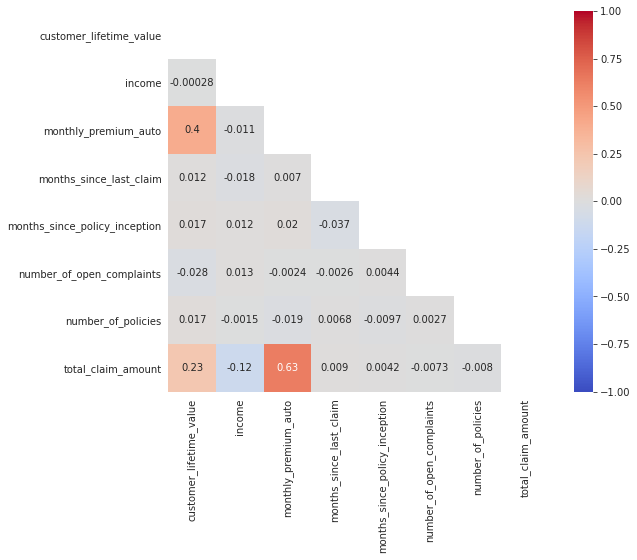

In [28]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### X-y split (y is the target variable which is the total claim amount)

In [29]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [30]:
df = pd.concat([numerical, categoricals], axis=1)

### REMOVE OUTLIERS

- Looking for outliers in a boxplot

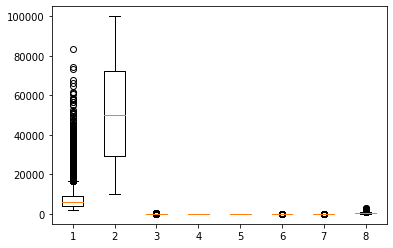

In [31]:
plt.boxplot(numerical)
plt.show()

- Let's take a closer look of some columns

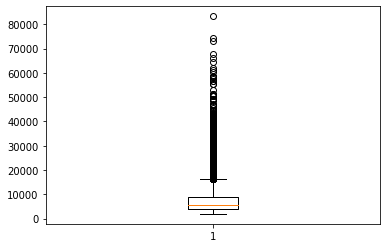

In [32]:
boxplot_1 = plt.boxplot(numerical['customer_lifetime_value']) #1

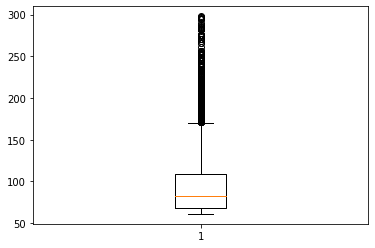

In [33]:
boxplot_3 = plt.boxplot(numerical['monthly_premium_auto']) #3

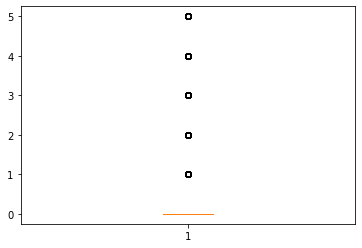

In [34]:
boxplot_6 = plt.boxplot(numerical['number_of_open_complaints']) #6

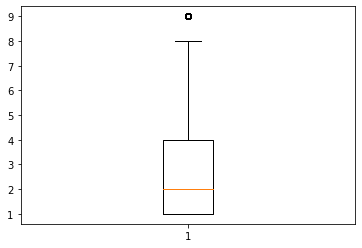

In [35]:
boxplot_7 = plt.boxplot(numerical['number_of_policies']) #7

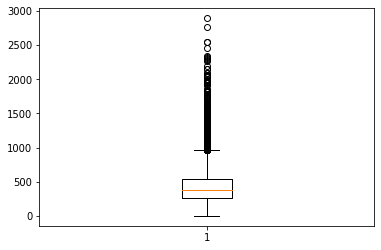

In [36]:
boxplot_8 = plt.boxplot(numerical['total_claim_amount']) #8

In [37]:
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
def remove_outliers(df):
    pct_75 = pct(df, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
    pct_25 = pct(df, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
    upper_bound = pct_75 + 1.5*iqr(df)  # iqr - > Scipy function to calculate the Interquartile Range
    lower_bound = pct_25 - 1.5*iqr(df)
    df = df[(df <= upper_bound) & (df >= lower_bound)]  # Filter out the outliers
    return df

In [38]:
df['customer_lifetime_value'] = remove_outliers(df['customer_lifetime_value'])
df['monthly_premium_auto'] = remove_outliers(df['monthly_premium_auto'])
df['total_claim_amount'] = remove_outliers(df['total_claim_amount'])

In [39]:
len(df)

10689

In [40]:
#Remove rows with NaN values after removing outliers

In [41]:
df = df.dropna()

In [42]:
len(df)

9171

## Activity 7

In [43]:
X = df.drop("total_claim_amount", axis=1)
y = df["total_claim_amount"]

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### ALL THE TRANSFORMATIONS HAS TO BEEN DONE AFTER THE SPLITTING AND APPLIED TO A NEW X_TRAIN CALLED X_TRAIN_SCALED OR X_TRAIN_TRANSFORMATION OR WHATEVER

<b>First transformation: Standarize the data

In [45]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [46]:
X_train_scaled

array([[ 0.38525127,  0.60739036, -1.12553919, ..., -0.22640904,
        -0.46569522,  1.86364448],
       [-0.98735573, -1.22149137, -0.2628722 , ..., -0.22640904,
        -0.46569522, -0.53658303],
       [-1.12891193, -0.68015066, -0.94392509, ..., -0.22640904,
        -0.46569522,  1.86364448],
       ...,
       [ 1.30520384,  1.16378491,  0.28197011, ..., -0.22640904,
        -0.46569522,  1.86364448],
       [ 0.55056287,  0.51113343,  0.46358422, ..., -0.22640904,
        -0.46569522, -0.53658303],
       [ 1.56651333,  0.5457015 ,  2.1889182 , ..., -0.22640904,
         2.14732717, -0.53658303]])

In [47]:
X_train_scaled.shape

(6419, 36)

In [48]:
X_test_scaled=std_scaler.transform(X_test)

<b>Second transformation: Power transformer to get a normal distribution

In [49]:
#X_train_scaled["monthly_premium_auto"]

In [50]:
#power=PowerTransformer().fit(X_train_scaled)   ##. finding the parameters ( mean, variance from the training set )

In [51]:
#power= PowerTransformer()
#power.fit(X_train_scaled)
#X_train_trans = power.transform(X_train_scaled)
#X_test_trans = power.transform(X_test_scaled)


In [52]:
# We should check is now looks normal distributed

### Apply linear regression

In [53]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

<b> model parameters  (b1,b2,b3,b4,b5,b6,b7)

In [54]:
model.coef_

array([ 2.94440423e-01, -3.02914533e+00,  8.90917337e+01,  2.19676465e-02,
       -2.28203157e-01, -4.48642286e-01, -7.53148598e-03,  1.62217343e+00,
       -3.39985624e+00,  6.35978264e+13, -2.86983786e+00,  4.01778219e+00,
       -1.52263405e+00,  1.83309991e-01, -5.90807691e+00, -2.44517101e+00,
        9.33767628e-01,  2.07876198e+00,  2.37929667e+01,  3.42381296e+00,
        1.73024755e+02,  8.13089528e+01, -5.73140177e-01,  1.88509411e+01,
        7.34948278e-02,  2.00679978e+00,  4.11520611e+00,  1.83775918e+00,
        3.75885724e+00,  1.31881827e+00, -2.00282074e-01,  1.53156374e+00,
       -1.06966225e+00,  3.15169889e-02, -5.06259547e-02,  1.17732189e+00])

In [55]:
model.intercept_

381.6000934725035

<b> Making predictions

We make predictions (y_pred) using X_test_scaled

In [56]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [57]:
y_pred.shape

(2752,)

In [58]:
y_pred_train.shape

(6419,)

In [59]:
y.shape

(9171,)

### Model evaluation

In [60]:
y_test

8320     305.0
2773       7.0
4031      75.0
4696     117.0
10646     14.0
         ...  
10446    547.0
3867     806.0
9440     547.0
7136     246.0
9369     491.0
Name: total_claim_amount, Length: 2752, dtype: float64

In [61]:
y_pred.shape   #same shape as y_test

(2752,)

In [62]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
8320,305.0,246.174986
2773,7.0,112.782182
4031,75.0,265.523890
4696,117.0,164.047834
10646,14.0,22.238939
...,...,...
10446,547.0,585.855080
3867,806.0,681.619503
9440,547.0,576.213263
7136,246.0,231.520891


### Analizing the model. What kind of plot you will get if all the all the predictions are ok? A stright line

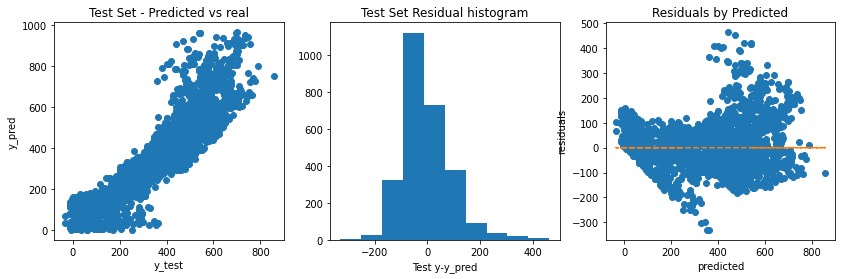

In [63]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [64]:
# first plot: checking linearity
# second plot: checking normality of residuals. It is a normal distribution, and the majority of residuals are close to 0. good! 
# --> No over or under estimation
# third plot: checking homoscedasticity. Variance is less constant than in the previos model

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

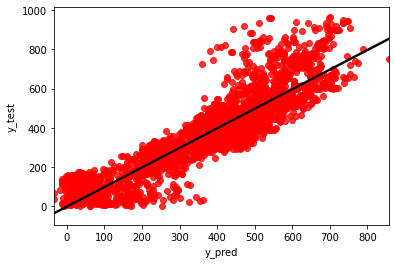

In [65]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Model evaluation

In [66]:
print ("MSE is " + str(round(mse(y_test,y_pred),2)))
print ("RMSE is " + str(round(mse(y_test,y_pred,squared=False),2)))
print ("Mean absolute error - MAE - is " + str(round(mae(y_test,y_pred),2)))

MSE is 8900.09
RMSE is 94.34
Mean absolute error - MAE - is 71.9


- r2

In [67]:
R2 = round(r2_score(y_test,y_pred),4)
R2

0.7838

- Adjusted r2

In [68]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7809332596685084

In [69]:
Adj_R2= round((1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),4)
Adj_R2

0.7809

In [70]:
Adj_R2= 1 - (1-(r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
Adj_R2

0.7942348968714341

In [71]:
round(1 - (1-(r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),4)

0.7942

### Evaluate error metrics also on train test

- If error_train very high -> Underfitting ( consider other model or to  add more variables)
- If error_train <= error_test -> Ok
- If error_train very small and <<<< error_test -> Overfitting!!!! ( you overtrained your model  or you did not applied the transformer to the test set ).


In [72]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [73]:
round(R2_test,4), round(R2_train,4)  #OK

(0.7838, 0.7848)

### Feature importance
- In order to check which independent features are more relevant to your model, compare the absolute value of each coefficient.

In [74]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [75]:
features_importances

,Attribute,Importance
9,month,6.359783e+13
20,location_code_suburban,1.730248e+02
2,monthly_premium_auto,8.909173e+01
21,location_code_urban,8.130895e+01
18,employment_status_unemployed,2.379297e+01
23,marital_status_single,1.885094e+01
14,response_yes,5.908077e+00
26,renew_offer_type_offer2,4.115206e+00
11,region_east,4.017782e+00
28,renew_offer_type_offer4,3.758857e+00


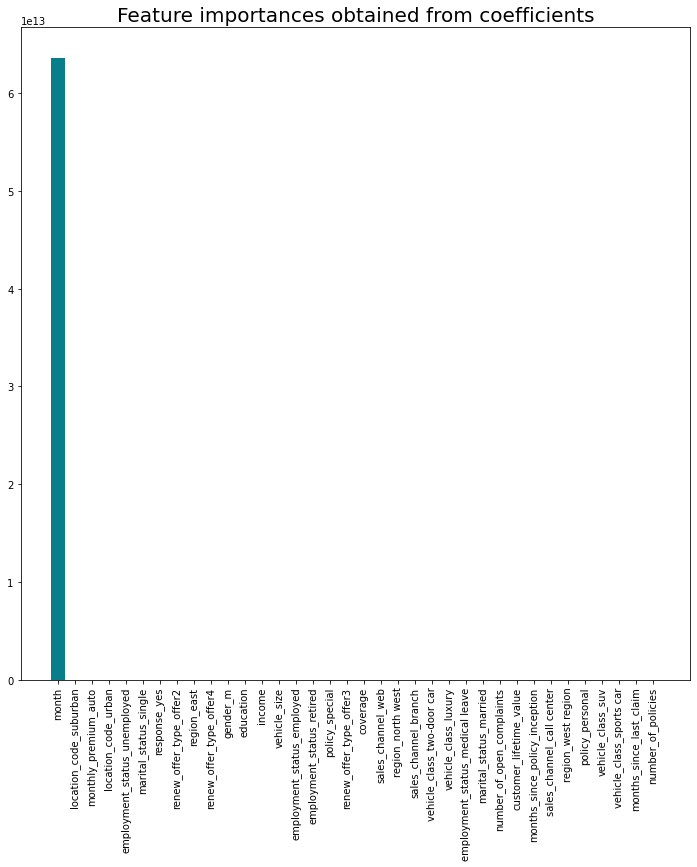

In [76]:
plt.figure(figsize=(12,12))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

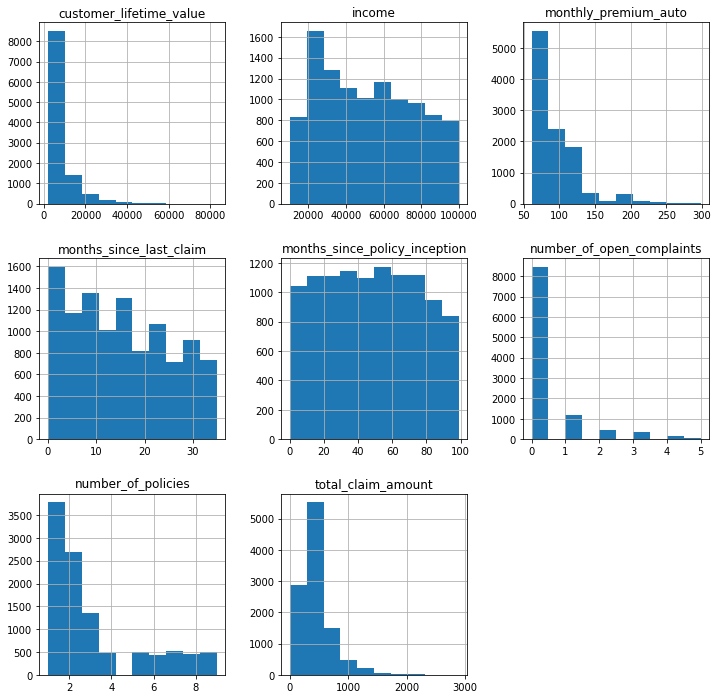

In [77]:
numerical.hist(figsize=(12,12))

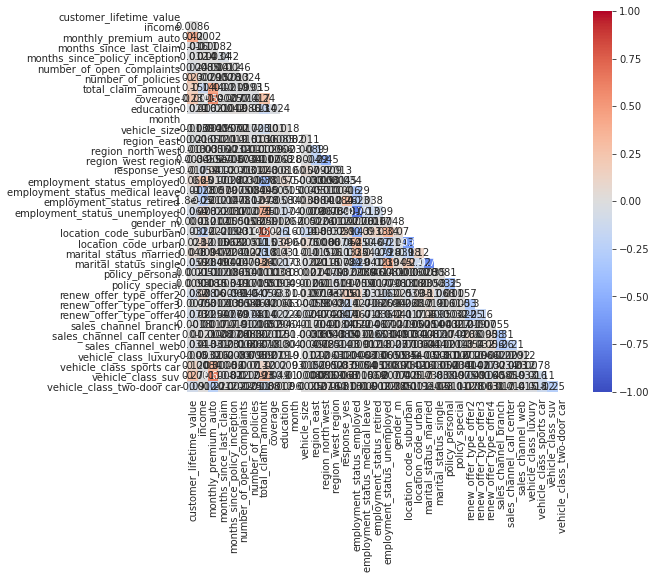

In [78]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [79]:
corr = df.corr()
corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
customer_lifetime_value,1.000000,0.008631,0.421024,-0.016327,-0.012386,-0.024259,0.226531,0.151703,0.234234,-0.021360,...,-0.081541,-0.007512,-0.073021,-0.001837,0.010071,-0.033613,-0.004963,0.122161,0.267000,-0.090280
income,0.008631,1.000000,-0.000196,-0.011455,0.013658,0.008473,-0.002897,-0.144381,-0.000836,0.016061,...,0.077662,0.003035,0.022440,-0.010299,0.020932,0.013443,-0.003225,-0.008427,-0.001131,0.011949
monthly_premium_auto,0.421024,-0.000196,1.000000,-0.008177,0.003415,-0.013921,-0.014662,0.440828,0.545661,-0.020730,...,-0.060422,-0.011591,-0.054456,0.016791,-0.002757,-0.031018,-0.015585,0.305364,0.620335,-0.221141
months_since_last_claim,-0.016327,-0.011455,-0.008177,1.000000,-0.041996,0.001189,0.002760,-0.020335,-0.002473,-0.000418,...,-0.000995,-0.013265,-0.007734,0.017122,0.002724,-0.023061,0.019619,0.000558,-0.008201,0.011678
months_since_policy_inception,-0.012386,0.013658,0.003415,-0.041996,1.000000,0.004564,-0.013270,-0.018909,0.007663,0.018745,...,-0.060855,0.005477,-0.068836,0.018597,-0.027848,-0.001624,-0.008891,0.020375,-0.012281,-0.002217
number_of_open_complaints,-0.024259,0.008473,-0.013921,0.001189,0.004564,1.000000,0.002385,-0.009266,-0.014268,0.008581,...,-0.046314,-0.008376,-0.007439,-0.012164,-0.008311,-0.008634,-0.007868,-0.006989,-0.012371,-0.002470
number_of_policies,0.226531,-0.002897,-0.014662,0.002760,-0.013270,0.002385,1.000000,-0.015107,-0.016635,-0.012741,...,-0.046811,0.006384,-0.080764,-0.015952,0.009185,0.008708,-0.005943,0.012568,-0.009273,-0.011268
total_claim_amount,0.151703,-0.144381,0.440828,-0.020335,-0.018909,-0.009266,-0.015107,1.000000,0.244071,-0.141997,...,-0.055598,-0.019800,-0.039955,0.005241,-0.000124,-0.018048,-0.002745,0.120520,0.281193,-0.087608
coverage,0.234234,-0.000836,0.545661,-0.002473,0.007663,-0.014268,-0.016635,0.244071,1.000000,-0.024376,...,-0.032993,0.000662,-0.022078,0.009410,-0.015035,-0.018347,-0.019499,-0.019515,-0.049484,-0.001171
education,-0.021360,0.016061,-0.020730,-0.000418,0.018745,0.008581,-0.012741,-0.141997,-0.024376,1.000000,...,-0.010198,0.013436,-0.023966,0.006375,0.010478,-0.004029,0.019431,-0.009281,-0.010199,0.009566


In [80]:
df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'coverage', 'education', 'month', 'vehicle_size', 'region_east',
       'region_north west', 'region_west region', 'response_yes',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single', 'policy_personal',
       'policy_special', 'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury', 'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car'],
      dtype='object')

In [81]:
categoricals.columns

Index(['coverage', 'education', 'month', 'vehicle_size', 'region_east',
       'region_north west', 'region_west region', 'response_yes',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single', 'policy_personal',
       'policy_special', 'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury', 'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car'],
      dtype='object')